# Hacktiv8 Phase 0: Graded Challenge 2

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Linear Algebra dan Calculus.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

![Image](https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg)

Dataset yang digunakan adalah gambar seekor anjing rhodesian ridgeback yang berukuran 438 x 780 pixels. Gambar dapat diunduh dari [sini](https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg).

### Objective

Dari sebuah gambar, gunakan konsep gradien untuk mendeteksi edge pada gambar dan lakukan operasi perkalian matriks pada gambar. Dengan langkah-langkah sebagai berikut:

1. Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus:

   $\frac{\partial I}{\partial x},\frac{\partial I}{\partial y}$

2. Hitung gradient magnitude tiap pixel dengan rumus:

   $\sqrt{(\frac{\partial I}{\partial x})^{2} + (\frac{\partial I}{\partial y})^{2}}$

3. Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ 30).
4. Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini hanya menggunakan **NumPy** dan **Matplotlib**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

Membuat matrix dari sebuah file `.jpg` menggunakan function `imread`.

In [2]:
image = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')

### Data Characteristic

Melihat isi dari data (matrix).

In [3]:
image

array([[[ 86,  93,  39],
        [ 86,  94,  37],
        [ 87,  90,  35],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  11],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  27],
        ...,
        [ 46,  38,  15],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  27],
        [ 46,  36,  11],
        [ 70,  60,  33]],

       ...,

       [[165, 150, 107],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 138,  86],
        [149, 137,  85],
        [145, 134,  80]],

       [[164, 149, 108],
        [157, 142, 101],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  91],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [148, 130,  90],
        ...,
        [160, 148, 100],
        [157, 145,  95],
        [150, 138,  88]]

In [4]:
image.shape

(438, 780, 3)

Dari bentuk (438, 780, 3) ini dapat diketahui bahwa data ini adalah array 3-D yang berupa gambar **RGB** dengan ukuran **438 x 780 pixels**, dimana:
- 480 menandakan pixel vertical.
- 780 menandakan pixel horizontal.
- 3 menandakan channel (Red, Green, Blue).

Melihat data dalam bentuk gambar.

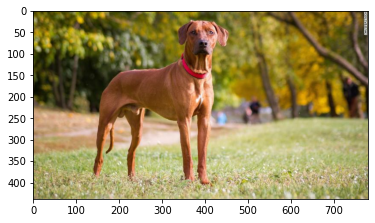

In [5]:
plt.imshow(image)

## Data Preprocessing

### Data Slicing

Pada bagian ini akan dilakukan ekstraksi channel (Red, Green, Blue) dari data.

In [6]:
Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

- Channel berindex **0** adalah matrix yang nilainya merepresentasikan warna **merah** ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+)
- Channel berindex **1** adalah matrix yang nilainya merepresentasikan warna **hijau** ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+)
- Channel berindex **2** adalah matrix yang nilainya merepresentasikan warna **biru** ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+)

Melakukan plotting dari hasil ekstraksi channel.

Text(0.5, 1.0, 'Gambar Filter B')

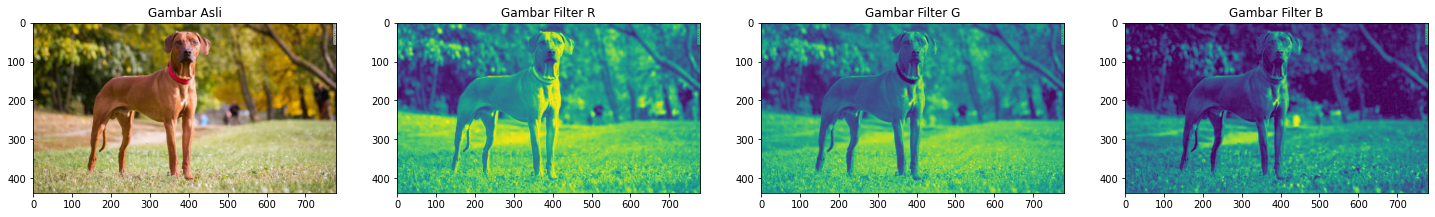

In [7]:
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
ax[0].imshow(image)
ax[0].set_title('Gambar Asli')
ax[1].imshow(Red)
ax[1].set_title('Gambar Filter R')
ax[2].imshow(Green)
ax[2].set_title('Gambar Filter G')
ax[3].imshow(Blue)
ax[3].set_title('Gambar Filter B')

### Grayscale

Setelah tiap channel diekstrak dari data, selanjutnya merubah data gambar menjadi bentuk grayscale dengan rumus: 

**0.299 x R + 0.587 x G + 0.114 x B**

In [8]:
Gray = 0.299 * Red + 0.587 * Green + 0.114 * Blue

Menampilkan data yang sudah dirubah menjadi grayscale.

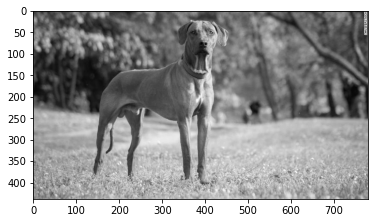

In [9]:
plt.imshow(Gray, cmap='gray')

In [10]:
Gray.shape

(438, 780)

Setelah data gambar dirubah menjadi grayscale, data tidak lagi berbentuk array 3-D melaikan menjadi array 2-D (matrix) yang berupa gambar **438 x 780 pixels**.

## Image Processing

Pada bagian ini akan dilakukan beberapa operasi perkalian matrix, perhitungan turunan parsial dari matrix, dan melakukan pencarian edge dari gambar dengan berbagai threshold. 

### Matrix Operation

Pada bagian operasi matrix ini akan dilakukan perkalian (dot product) matrix grayscaled dengan matrix identitas dan matrix identitas (dalam bentuk negatif).

#### Create Identity Matrix

Membuat matrix identitas berukuran 780 baris dan 780 kolom dengan menggunakan function numpy `eye`.

In [24]:
identity = np.eye(780)

In [25]:
identity.shape

(780, 780)

Matrix identitas berbentuk square matrix dengan ukuran **780 x 780**.

#### Matrix Operation Plot

Melakukan plotting dari hasil perkalian matrix grayscaled dengan matrix identitas.

Text(0.5, 1.0, 'Grayscaled x Identity')

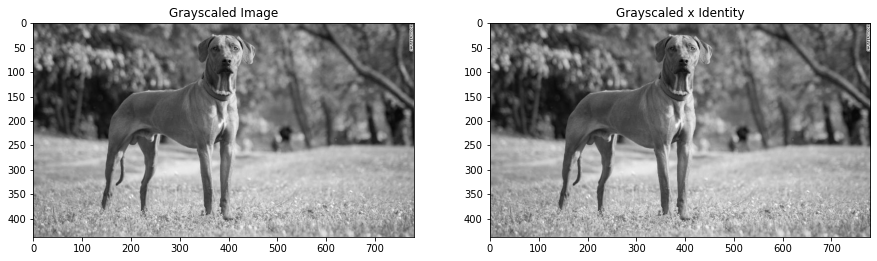

In [47]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(Gray, cmap='gray')
ax[0].set_title('Grayscaled Image')
ax[1].imshow(Gray @ identity, cmap='gray')
ax[1].set_title('Grayscaled x Identity')

Dapat dilihat hasil dari perkalian matrix grayscaled dengan matrix identitas tidak merubah apapun, karena jika sebuah matrix dikalikan dengan matrix identitas akan menghasilkan matrix itu sendiri.

Selanjutnya melakukan plotting dari hasil perkalian matrix grayscaled dengan matrix identitas (dalam bentuk negative).

Text(0.5, 1.0, 'Grayscaled x Negative Identity')

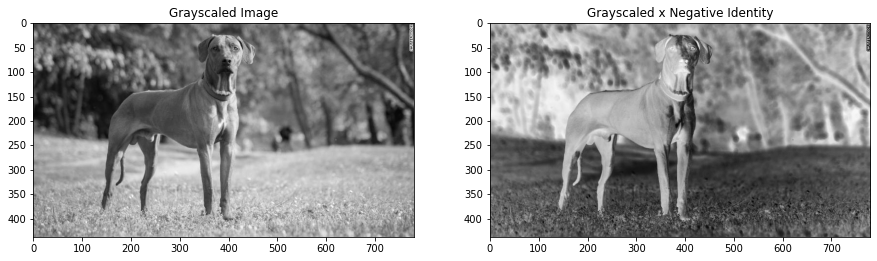

In [46]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(Gray, cmap='gray')
ax[0].set_title('Grayscaled Image')
ax[1].imshow(Gray @ ((-1) * identity), cmap='gray')
ax[1].set_title('Grayscaled x Negative Identity')

Dari gambar di atas memperlihatkan hasil perkalian matrix grayscaled dengan matrix identitas yang dikalikan dengan (-1) menghasilkan gambar yang berbeda dari gambar sebelumnya dimana **pixel terang berubah menjadi gelap** dan **pixel gelap berubah menjadi terang**.

### Partial Derivative

Pada bagian ini akan menghitung turunan parsial dari matrix grayscaled pada tiap sumbunya (x, y) dengan menggunakan rumus:

$\frac{\partial I}{\partial x},\frac{\partial I}{\partial y}$

Menghitung turunan parsial menggunakan `numpy.gradient()` yang returnnya berupa 2 matrix hasil turunan parsial terhadap **sumbu x** dan **sumbu y**.

In [14]:
dx, dy = np.gradient(Gray)

Melakukan plotting perhitungan turunan parsial.

Text(0.5, 1.0, 'dy')

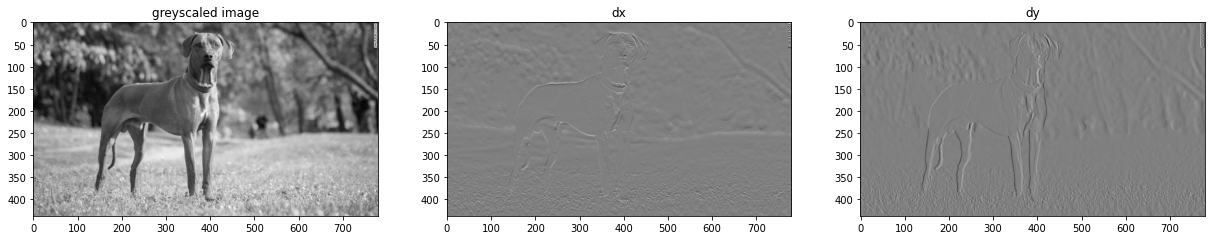

In [15]:
fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(Gray, cmap='gray')
ax[0].set_title('greyscaled image')
ax[1].imshow(dx, cmap='gray')
ax[1].set_title('dx')
ax[2].imshow(dy, cmap='gray')
ax[2].set_title('dy')

Dari gambar di atas, hasil turunan parsial terhadap sumbu x menghasilkan gambar yang berefek **bevel** sedangkan hasil turunan parsial terhadap sumbu y menghasilkan gambar yang berefek **emboss**.

### Gradient Magnitude

Setelah mendapatkan hasil dari turunan parsial selanjutnya matrix hasil turunan parsial akan digunakan untuk menghitung **Gradient Magnitude** dari tiap pixel dengan menggunakan rumus:

$\sqrt{(\frac{\partial I}{\partial x})^{2} + (\frac{\partial I}{\partial y})^{2}}$

In [16]:
magnitude = np.sqrt(dx**2 + dy**2)

Menampilkan matrix hasil perhitungan gradient magnitude.

In [17]:
magnitude

array([[  9.00715721,   9.40800521,   8.11033626, ...,   2.82183154,
         18.7722732 ,  25.49605844],
       [ 10.242     ,  10.1843726 ,   8.89490287, ...,   7.03965173,
          4.57699164,  27.49518871],
       [  8.75538806,   9.0101237 ,   8.02792383, ..., 107.56861748,
         15.269887  ,  31.18010802],
       ...,
       [  6.03220575,   7.98814166,   9.75569067, ...,   2.12720621,
          2.64970536,   3.63451995],
       [  7.01063449,   8.54058114,   8.6589405 , ...,   5.24223044,
          5.47594668,   5.74321254],
       [  7.        ,   8.9945    ,   9.0499188 , ...,   5.24602461,
          6.49253387,   7.34601824]])

In [18]:
magnitude.shape

(438, 780)

Dari hasil perhitungan gradient magnitude tersebut menghasilkan matrix baru dengan ukuran **438 x 780**.

Text(0.5, 1.0, 'Gradient Magnitude')

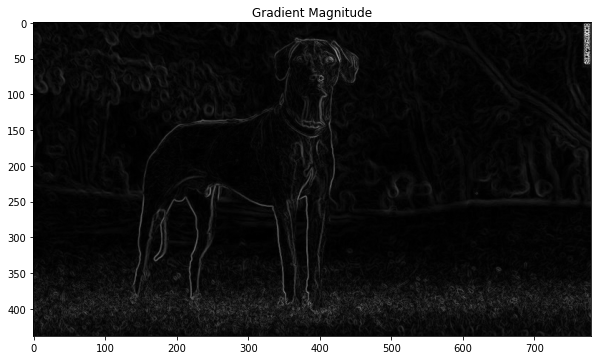

In [65]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')

Dari plot menggunakan matrix hasil perhitungan gradient magnitude sebenarnya edge sudah terdeteksi tetapi hasilnya masih belum optimal, yang selanjutnya akan dicari edge optimal pada bagian **Edge Detection**.

### Edge Detection

Setelah gradient magnitude dihitung, selanjutnya adalah mencari edge optimal menggunakan matrix hasil perhitungan gradient magnitude dengan beberapa percobaan dengan threshold (ambang) yang berbeda.

#### Threshold > 30

Text(0.5, 1.0, 'Threshold > 30')

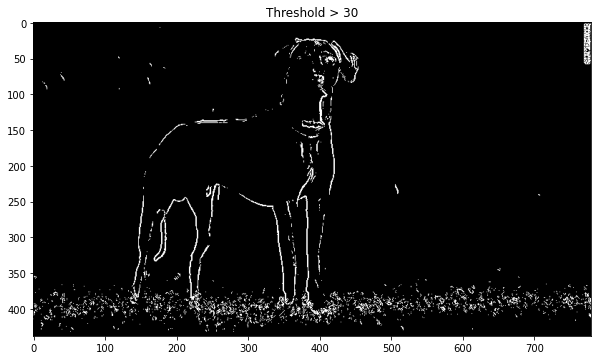

In [66]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(magnitude > 30, cmap='gray')
plt.title('Threshold > 30')

Dengan menggunakan **threshold > 30** edge yang terdeteksi sudah cukup baik, tetapi masih ada beberapa bagian yang tidak terdeteksi dengan baik seperti pada bagian **kuping** dan **kaki depan**.

#### Threshold > 40

Text(0.5, 1.0, 'Threshold > 40')

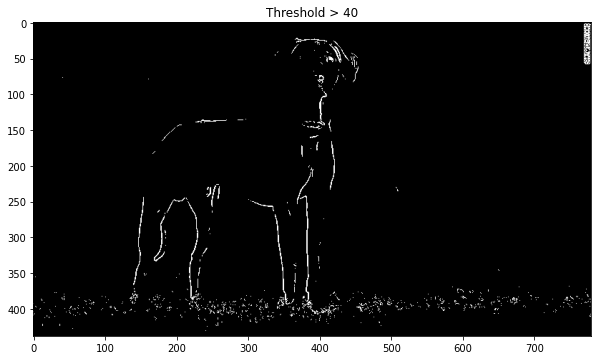

In [67]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(magnitude > 40, cmap='gray')
plt.title('Threshold > 40')

Dengan menggunakan **threshold > 40** edge tidak terdeteksi dengan baik, bahkan pada bagian **leher** dan **kaki** tidak terbentuk garis edge yang terdeteksi.

#### Threshold > 20

Text(0.5, 1.0, 'Threshold > 20')

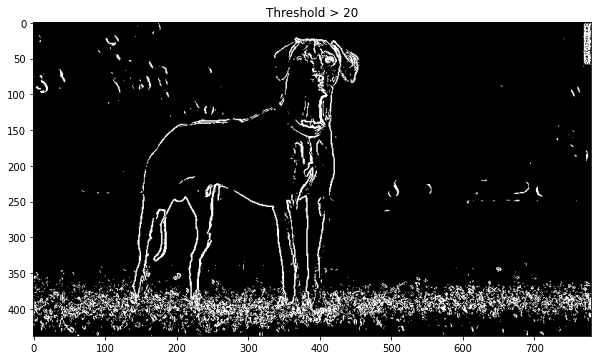

In [68]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(magnitude > 20, cmap='gray')
plt.title('Threshold > 20')

Dengan menggunakan **threshold > 20** terbentuk dengan jelas garis yang memebentuk tubuh dari anjing yang mengartikan edge terdeteksi dengan baik.

#### Threshold > 10

Text(0.5, 1.0, 'Threshold > 10')

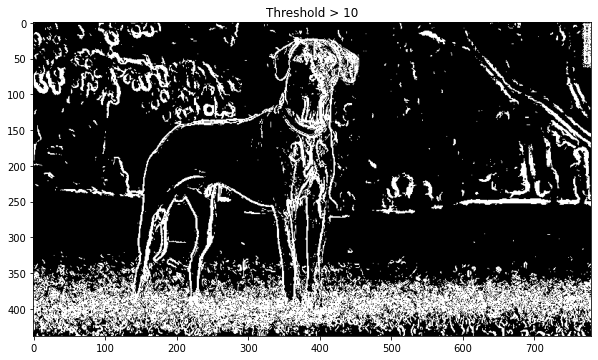

In [69]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(magnitude > 10, cmap='gray')
plt.title('Threshold > 10')

Dengan menggunakan **threshold > 10** tubuh dari anjing terbentuk sangat jelas tetapi terlalu banyak pixel tidak relevant ikut terdeteksi sebagai edge.

## Conclusion

Kesimpulan yang dapat ditarik dari hasil deteksi tepi (Edge Detection) pada gambar anjing rhodesian ridgeback dengan menggunakan **4** threshold yang berbeda adalah:

Dengan menggunakan **threshold > 10** walaupun edge dari tubuh anjing terdeteksi dengan sangat jelas tetapi banyak pixel tidak relevant yang ikut terdeteksi sebagai edge, berbanding terbalik dengan menggunakan **threshold > 40** banyak bagian tubuh yang tidak terdeteksi edgenya. Sedangkan dengan menggunakan **threshold > 30** edge bisa terdeteksi dengan cukup baik, tetapi jika dibandingkan dengan menggunakan **threshold > 20** edge pada tubuh anjing terlihat lebih jelas terutama pada bagian **kuping** dan **kaki depan**.

Jadi, dengan menggunakan **threshold > 20** pada dataset gambar anjing rhodesian ridgeback yang digunakan edge dapat **terdeteksi lebih optimal**.